In [95]:
##Import Statements
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
#Function to add ticker
def tickAdder(ticker):
    tick = yf.Ticker(ticker)
    tick = tick.history(start="1999-08-15", end="2024-06-07")
    return tick

In [97]:
#Function to plot Corr Matrix
def corrMatrix(dataframe):
    correlation_matrix = dataframe.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

In [73]:
##Import Apple Data
data = yf.Ticker("aapl")
data = data.history(start="1999-08-15", end="2024-06-07")

In [74]:
##Feature Implementation 

#Rolling averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

#Volatility indicator
data['std_20'] = data['Close'].rolling(window=20).std()

# Calculate Technical Indicators (RSI)
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate lagged values
data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag2'] = data['Close'].shift(5)

In [75]:
#Ensure that there exist no null values
data = data[202:]

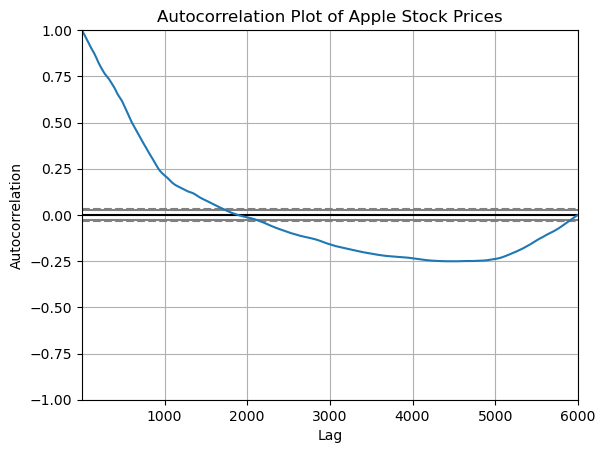

In [76]:
close_prices = data['Close']

# Calculate autocorrelation using pandas autocorr() function
autocorr_values = close_prices.autocorr()

# Plot autocorrelation function (ACF)
pd.plotting.autocorrelation_plot(close_prices)
plt.title('Autocorrelation Plot of Apple Stock Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [103]:
#Add msft ticker
msft = tickAdder("msft")
nvda = tickAdder("nvda")

In [104]:
data["Close Nvidia"] = nvda["Close"]

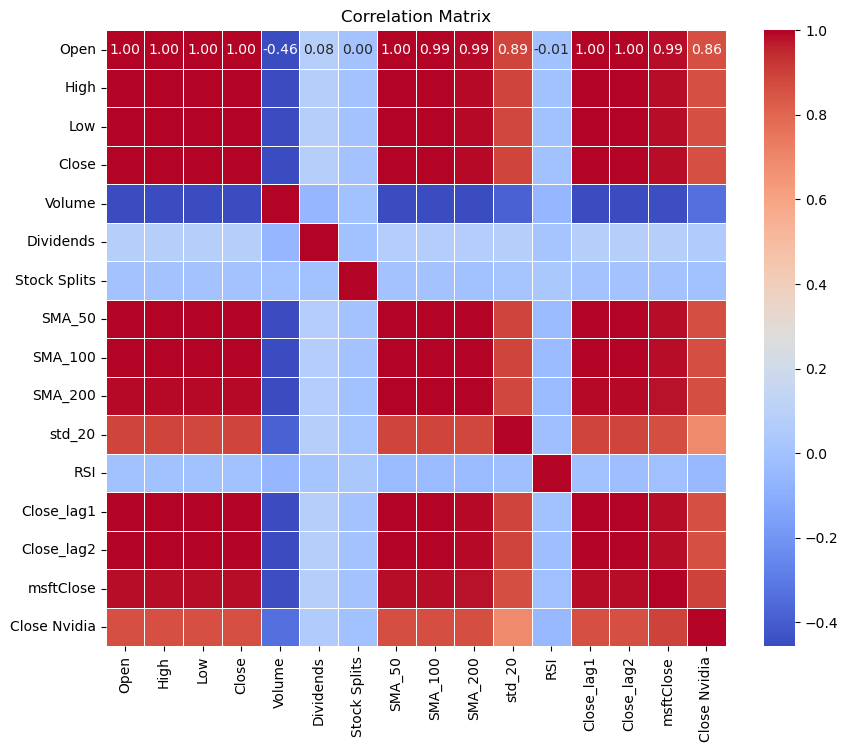

In [105]:
corrMatrix(data)